<a href="https://colab.research.google.com/github/ErickMM98/NetworkAnalysis_TwitterTrends/blob/main/tesis_NetworkAnalysisTrend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Install and define all the framework

In [ ]:
!pip install latex

In [1]:
import tarfile
import pandas as pd
import numpy as np
import networkx as nx
#import networkit as nk
import matplotlib.pyplot as plt
import matplotlib as mpl
import datetime as dt
import collections
import itertools
import random
import seaborn as sn
import threading
import os
import logging
import pytz
from datetime import datetime


plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['font.size'] = 15
plt.rcParams['font.family'] = 'serif'
plt.rcParams['text.usetex'] = False

#mpl.rcParams['axes.prop_cycle'] = cycler(color=['r', 'g', 'b', 'y'])
print(plt.style.available)
plt.style.use('bmh')
#plt.style.use('classic')

#plt.rcParams.keys()
B = pd.read_csv('/content/drive/MyDrive/FC_Materias/FC_Proyecto_1/finaldf.csv')
#b = B[ B['trend'] == trend]['burst'].to_list()[0]

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [2]:
#@title Some variables and extract the data. 
#GENERAL VALUES (secret values to public)
 
main_seed = 123456789
np.random.seed(main_seed)
 
path_main_drive = "/content/drive/My Drive/NetworkAnalysis_TwitterTrends/virality2013.tar.gz"
path_friends_followers = "/content/follower_gcc.anony.dat"
path_tweets_users = "/content/timeline_tag.anony.dat"
path_retweets_users = "/content/timeline_tag_rt.anony.dat"
path_mentions_users = "/content/timeline_tag_men.anony.dat"


#FINALS_DATAFRAME
path_final_dataframe = '/content/drive/MyDrive/FC_Materias/FC_Proyecto_1/finaldf.csv'

 
def extract_file_from_drive():
  """
  Function to extract all the data files.
  Just for the first time. 
  """
  my_tar = tarfile.open(path_main_drive)
  my_tar.extractall('//content')
  my_tar.close()  
 
def get_data_followers_and_friends():
  """
  Function to get a dataframe for the file with 
  the basic relation of mutual follow.
 
  return @Dataframe 
  """
  data = pd.read_csv(path_friends_followers,
                     sep=' ',
                     #nrows = 10000000,
                     names=['source', 'target'])
  return data
 
def get_data_tweets_time():
  """
  Function to get a dataframe for the file with 
  the basic relation of mutual follow.
 
  return @Dataframe 
  """
  data = pd.read_csv(path_tweets_users,
                     sep=' ',
                     nrows = 100)
                     #names=['source', 'target'])
  return data
 
 
def get_data_retweets_time():
  """
  Function to get a dataframe for the file with 
  the basic relation of mutual follow.
 
  return @Dataframe 
  """
  pass
 
def get_data_mentions_time():
  """
  Function to get a dataframe for the file with 
  the basic relation of mutual follow.
 
  return @Dataframe 
  """
  pass
 
def givehour(timestamp):
    day_string = timestamp.hour
    return day_string
 
def giveday(timestamp):
    day_string = timestamp.dayofyear
    return day_string
"""
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
------------------------ Plot beauty networks ---------------------------------
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
"""
 
 
def plot_social_network():
  """
  Function to plot fancy social network
  """


"""
FUNCIONES PARA LEER LA INFORMACIÓN
"""
K_number_tweets = 4000
#K_number_tweets = 0
"""
OBTENER LA INFOR COMO DICCIONARIOS.
"""
 
def get_dic_tweets():
  """
  TWEETS
  Función para leer la info en un diccionario
  """
  name_all_hastag = {}
  with open(path_tweets_users, 'r') as reader:
    for line in reader:
      list_tweets = line.split()
      namehashatag = list_tweets.pop(0)
      count_tw = len(list_tweets)
      if count_tw >  K_number_tweets:
        name_all_hastag[namehashatag] = list_tweets
  return name_all_hastag
 
def get_dic_retweets():
  """
  RETWEETS
  Función para leer la info en un diccionario
  """
  name_all_hastag = {}
  with open(path_retweets_users, 'r') as reader:
    for line in reader:
      list_tweets = line.split()
      namehashatag = list_tweets.pop(0)
      name_all_hastag[namehashatag] = list_tweets
  return name_all_hastag
 
def get_dic_mentions():
  """
  MENCIONES
  Función para leer la info en un diccionario
  """
  name_all_hastag = {}
  with open(path_mentions_users, 'r') as reader:
    for line in reader:
      list_tweets = line.split()
      namehashatag = list_tweets.pop(0)
      name_all_hastag[namehashatag] = list_tweets
  return name_all_hastag
 
extract_file_from_drive()
 
#Toda la info
dic_tweets_user = get_dic_tweets()
dic_retweets_user = get_dic_retweets()
dic_mentions_user = get_dic_mentions()
 
 
#Vamos a tomar las tendencias que coincidan.
set_trend_tweets = set(dic_tweets_user.keys())
set_trend_retweets = set(dic_retweets_user.keys())
set_trend_menntions = set(dic_mentions_user.keys())
 
#Variables generales
list_trends = list(set_trend_menntions & set_trend_retweets & set_trend_tweets )
df_mutual_follow = get_data_followers_and_friends()


array_true_trends = pd.read_csv(path_final_dataframe)[['trend','burst']]

# Some important stadistics. 

In [ ]:
#@title The most important trend (sortef by the number of Tweets)

dict_trend_numberTweets = {}
numberPlotTrends = 15

def addHashtagForTrend(fooStr):
  """
  Simple function to add the '#' in the name trend fooStr.
  input: fooStre = Trend name
  return "#fooStre"
  """
  return "#{}".format(fooStr)

for trend in dic_tweets_user:
  nTweets = len(dic_tweets_user[trend])
  dict_trend_numberTweets[trend] = nTweets

marklist = sorted(dict_trend_numberTweets.items(), key=lambda x:x[1], reverse=True)
marklist = marklist[:numberPlotTrends]

dfPlot = pd.DataFrame(marklist, columns=['Tendencia', 'Cantidad de Tweets'])
dfPlot['Tendencia'] = dfPlot['Tendencia'].apply(addHashtagForTrend)
dfPlot.to_latex(index=False)

'\\begin{tabular}{lr}\n\\toprule\n             Tendencia &  Cantidad de Tweets \\\\\n\\midrule\n                 \\#oomf &              363518 \\\\\n                   \\#np &              158608 \\\\\n                   \\#nf &              128920 \\\\\n                   \\#ff &              123875 \\\\\n       \\#teamfollowback &               83064 \\\\\n              \\#bahrain &               59277 \\\\\n                   \\#rt &               51735 \\\\\n \\#thoughtsduringschool &               50927 \\\\\n                 \\#yolo &               50256 \\\\\n             \\#dearoomf &               40894 \\\\\n              \\#retweet &               39097 \\\\\n                  \\#lrt &               35357 \\\\\n                   \\#nw &               35323 \\\\\n               \\#taurus &               35309 \\\\\n                   \\#lt &               32226 \\\\\n\\bottomrule\n\\end{tabular}\n'

## The final DF of NCT

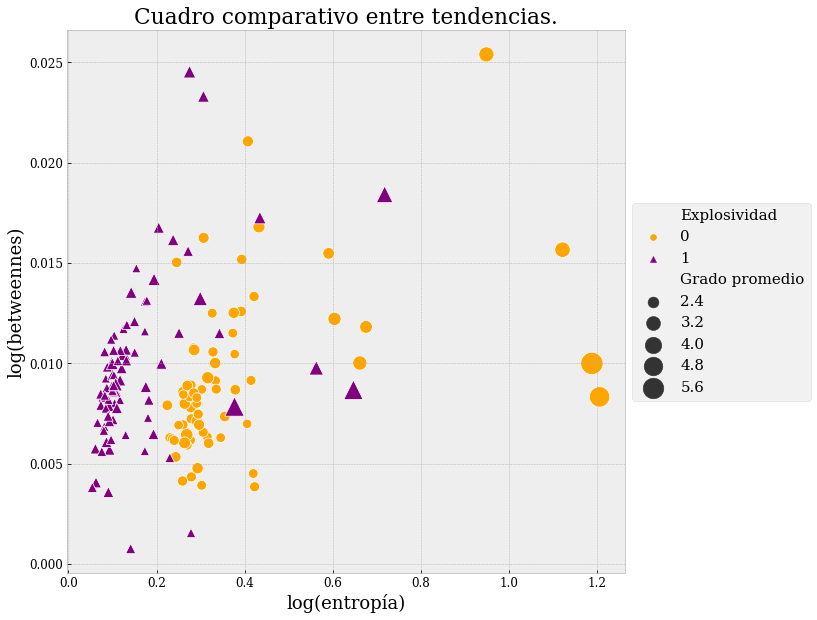

In [ ]:
finaldf = "/content/drive/My Drive/FC_Materias/FC_Proyecto_1/finaldf.csv"

df = pd.read_csv(finaldf)

#Refactor section 
df = df.rename(columns={'burst': 'Explosividad',
                        'k' : 'Grado promedio'})

fig, ax = plt.subplots()
fig.set_size_inches([10,10])
ax.set_title("Cuadro comparativo entre tendencias.")
ax.set_xlabel("log(entropía)")
ax.set_ylabel("log(betweennes)")
g = sn.scatterplot(x = 'entropy', 
              y = 'betweenness', 
              hue='Explosividad', 
              style = 'Explosividad',
              markers = {1:'^',
                       0: 'o'}, 
              size = 'Grado promedio', 
              legend = 'brief',
              sizes=(80, 500),
              palette={1:'purple',
                       0: 'orange'},
              data=df,
              ax = ax)
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
#list_names = g.get_legend_handles_labels()

fig.show()

# Make beauty graphs

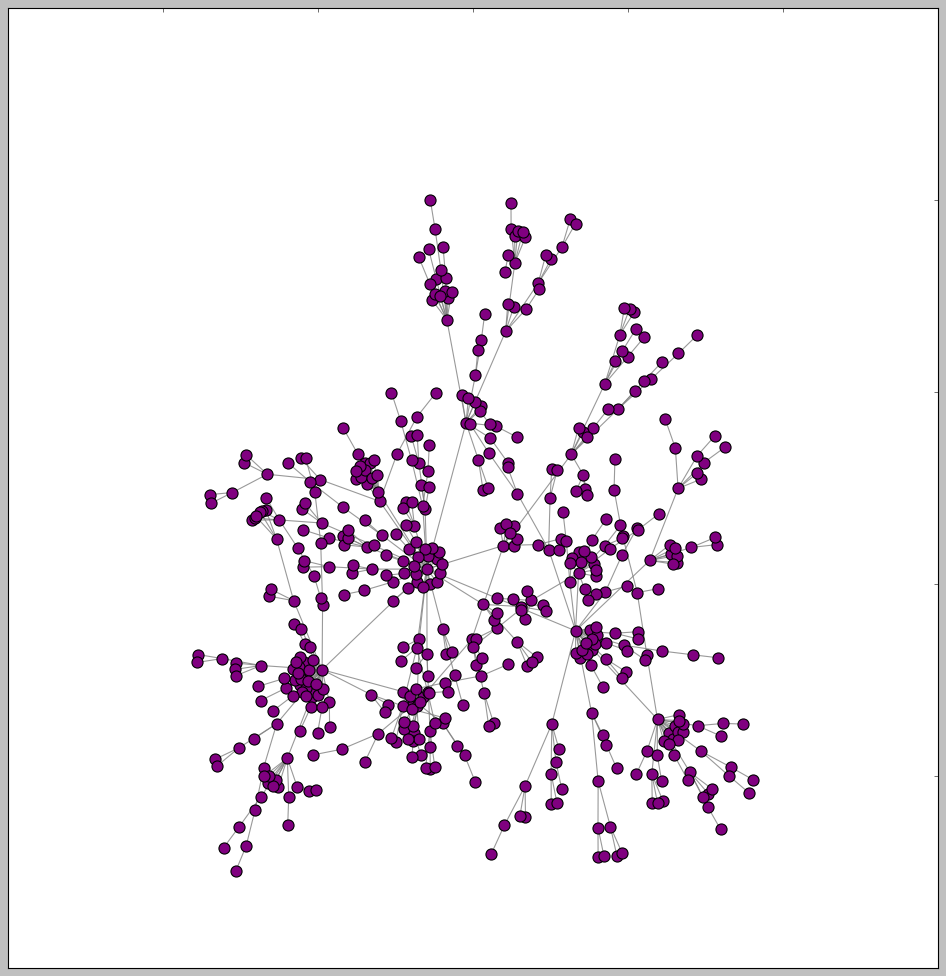

In [ ]:
#@title Barabasi graphs

import networkx as nx

G = nx.barabasi_albert_graph(500,1)


pos = nx.spring_layout(G)

fig, ax = plt.subplots()
fig.set_size_inches([15,15])
nx.draw_networkx_edges(G, pos=pos, edge_color='gray', alpha=0.8)
nx.draw_networkx_nodes(G, pos=pos, node_color='purple', node_size=100)
ax.grid(False)
#nx.draw(G, ax= ax)

fig.savefig("marcoteorico_barabasi.pdf")


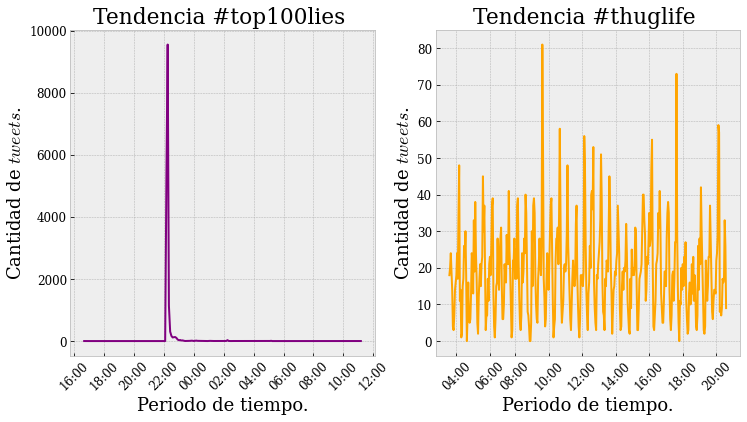

In [ ]:
#@title Example of time series

# foo_dataframe = pd.DataFrame(data = {'time': np.array(foo_df['time'], dtype='datetime64'),
#                                         'count': np.repeat([1], repeats= foo_df['time'].shape[0]),
#                                          'core': foo_df['core']})

from datetime import datetime



#print(datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S'))
def list_timestamp_id_to_df(list_timestamp):
  timestamp_id, user_id = list_timestamp.split(',')
  timestamp_id = int(timestamp_id)
  #user_id = int(user_id)
  return datetime.utcfromtimestamp(timestamp_id).strftime('%Y-%m-%d %H:%M:%S')

def user_to_df(list_timestamp):
  timestamp_id, user_id = list_timestamp.split(',')
  user_id = int(user_id)
  return user_id

fig , axes = plt.subplots(1,2)
fig.set_size_inches([12,6])
ax = axes.ravel()

#i = 4
for cap in array_true_trends.values[0:25]:
  name_trend = cap[0]
  burst_trend = cap[1]
  if name_trend in ['top100lies', 'thuglife']:
    foo_tweets_by_trend = dic_tweets_user[name_trend]
    time_output_list = list(map(list_timestamp_id_to_df, foo_tweets_by_trend))
    user_output_list = list(map(user_to_df, foo_tweets_by_trend))

    array_time = np.array(time_output_list, dtype='datetime64')
    user_time = np.array(user_output_list)
    foo_dataframe = pd.DataFrame(data = {'time': array_time,
                                          'count': np.repeat([1], repeats= array_time.shape[0])})
    freq = "120min"
    foo = foo_dataframe.groupby(pd.Grouper(key="time",freq=freq)).sum()

    if burst_trend:
      ax[0].plot(foo.index, foo['count'], color = 'purple')
      ax[0].set_title("Tendencia #{} ".format(name_trend))
      ax[0].set_xticklabels(list( map( lambda x: str(x).split(' ')[1][0:5],foo.index) ), rotation=45, size = 12)
      ax[0].set_ylabel("Cantidad de $tweets$.")
      ax[0].set_xlabel("Periodo de tiempo.")
    else:
      ax[1].plot(foo.index, foo['count'], color = 'orange')
      ax[1].set_title("Tendencia #{} ".format(name_trend))
      ax[1].set_ylabel("Cantidad de $tweets$.")
      ax[1].set_xticklabels(list( map( lambda x: str(x).split(' ')[1][0:5],foo.index) ), rotation=45, size = 12)
      ax[1].set_xlabel("Periodo de tiempo.")

fig.show()

fig.savefig("introduction_timeserie.pdf")

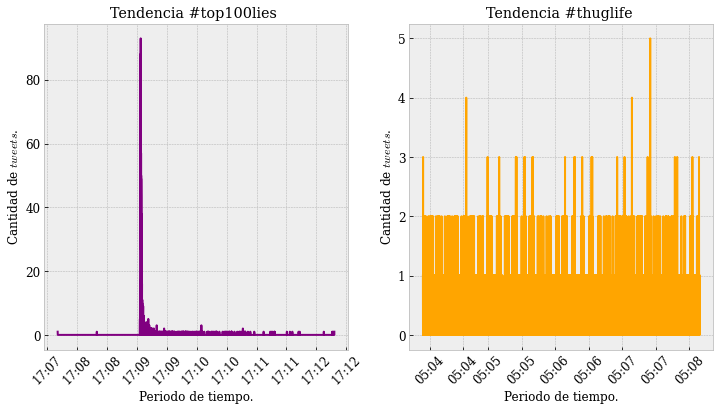

In [ ]:
#@title Ejemplo de discretización buena y mala

from datetime import datetime



#print(datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S'))
def list_timestamp_id_to_df(list_timestamp):
  timestamp_id, user_id = list_timestamp.split(',')
  timestamp_id = int(timestamp_id)
  #user_id = int(user_id)
  return datetime.utcfromtimestamp(timestamp_id).strftime('%Y-%m-%d %H:%M:%S')

def user_to_df(list_timestamp):
  timestamp_id, user_id = list_timestamp.split(',')
  user_id = int(user_id)
  return user_id

fig , axes = plt.subplots(1,2)
fig.set_size_inches([12,6])
ax = axes.ravel()

#i = 4
for cap in array_true_trends.values[0:25]:
  name_trend = cap[0]
  burst_trend = cap[1]
  if name_trend in ['top100lies', 'thuglife']:
    foo_tweets_by_trend = dic_tweets_user[name_trend]
    time_output_list = list(map(list_timestamp_id_to_df, foo_tweets_by_trend))
    user_output_list = list(map(user_to_df, foo_tweets_by_trend))

    array_time = np.array(time_output_list, dtype='datetime64')
    user_time = np.array(user_output_list)
    foo_dataframe = pd.DataFrame(data = {'time': array_time,
                                          'count': np.repeat([1], repeats= array_time.shape[0])})
    freq = "30s"
    foo = foo_dataframe.groupby(pd.Grouper(key="time",freq=freq)).sum()

    if burst_trend:
      ax[0].plot(foo.index, foo['count'], color = 'purple')
      ax[0].set_title("Tendencia #{} ".format(name_trend))
      ax[0].set_xticklabels(list( map( lambda x: str(x).split(' ')[1][0:5],foo.index) ), rotation=45, size = 12)
      ax[0].set_ylabel("Cantidad de $tweets$.")
      ax[0].set_xlabel("Periodo de tiempo.")
    else:
      ax[1].plot(foo.index, foo['count'], color = 'orange')
      ax[1].set_title("Tendencia #{} ".format(name_trend))
      ax[1].set_ylabel("Cantidad de $tweets$.")
      ax[1].set_xticklabels(list( map( lambda x: str(x).split(' ')[1][0:5],foo.index) ), rotation=45, size = 12)
      ax[1].set_xlabel("Periodo de tiempo.")

fig.show()

fig.savefig("introduction_timeserie.pdf")


In [5]:
foo_dict_complete_network = {}
path = "/content/drive/MyDrive/NetworkAnalysis_TwitterTrends/data_new_vecindad/data_nodes_df"
path_network = "/content/drive/MyDrive/NetworkAnalysis_TwitterTrends/data_new_vecindad/data_cm_network/"
list_delete = ['weed',
               'first20songsonsuffle']
n = 50
for file_trend in os.listdir(path)[0:n]:
  trend = file_trend.split('.')[0]
  if not trend in list_delete:
    path_file = "{}/{}.gml".format(path_network,trend)
    #b = B[ B['trend'] == trend]['burst'].to_list()[0]
    foo_dict_complete_network[trend] = nx.read_gml(path_file)

rns
1 / 50
1 / 50
thingspeopledothatgetonmynerves
2 / 50
2 / 50
teamautofollow
3 / 50
3 / 50
liestoldontwitter
4 / 50
4 / 50
arentyoutiredof
5 / 50
5 / 50
whatmakesmesmile
6 / 50
6 / 50
youknowwhatannoysme
7 / 50
7 / 50
somefactsyoushouldknow
8 / 50
8 / 50
autofollowback
9 / 50
9 / 50
team
10 / 50
10 / 50
libras
11 / 50
11 / 50
soundcloud
12 / 50
12 / 50
wewontworkoutif
13 / 50
13 / 50
youdontbelongontwitterif
14 / 50
14 / 50
thingsblackpeopletakeseriously
15 / 50
15 / 50
followme
16 / 50
16 / 50
respect
17 / 50
17 / 50
amitheonlyonethat
18 / 50
18 / 50
followngain
19 / 50
19 / 50
tweetyourheight
20 / 50
20 / 50
iwanttopunchpeoplewho
21 / 50
21 / 50
hardestthingsinlife
22 / 50
22 / 50
whatgetsmemad
23 / 50
23 / 50
win
24 / 50
24 / 50
thingsthatfrustrateme
25 / 50
25 / 50
bbl
26 / 50
26 / 50
itscrazyhow
27 / 50
27 / 50
1000aday
28 / 50
28 / 50
twitterafterdark
29 / 50
29 / 50
thingsthatguyslike
30 / 50
30 / 50


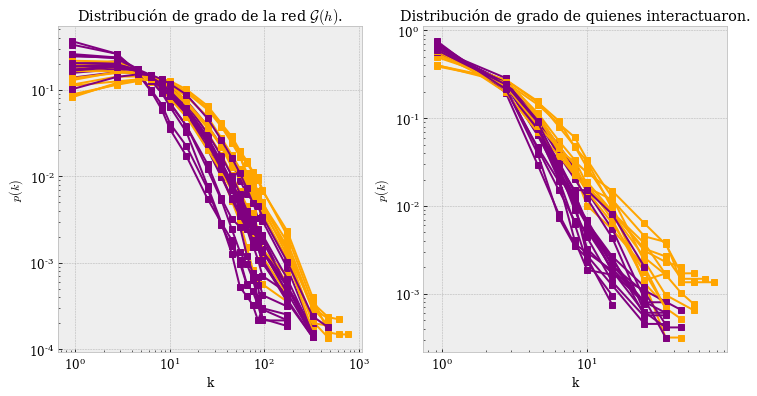

In [10]:
#@title Diferencias de red

import numpy as np
from matplotlib import pyplot as plt
def binneo_degree_distribution(G):
  list_foo = sorted([d for (i,d) in G.degree()], reverse=False)
  dict_degree = dict(collections.Counter(list_foo))
  degreeCount = list(dict_degree.values())
  degreeCount = np.array(degreeCount) 
  degreeKey = list(dict_degree.keys())

  n_bins = 7
  X_bins = []
  Y_bins = []
  #Para 0 a 10
  bins = np.linspace(0, 10 + 1, n_bins)
  for indice in range(len(bins) - 1):
    lower = bins[indice]
    upper = bins[indice+1]
    keys_true = []
    for key in degreeKey:
      if lower < key and key <= upper:
        keys_true.append(key)
    mean_y_values = []
    for key in keys_true:
      mean_y_values.append(dict_degree[key])
    if len(keys_true):
      X_bins.append( (lower + upper)/2 )
      Y_bins.append( np.mean(mean_y_values))

  #Para 10 a 100
  bins = np.linspace(10, 100 + 1, 10)
  for indice in range(len(bins) - 1):
    lower = bins[indice]
    upper = bins[indice+1]
    keys_true = []
    for key in degreeKey:
      if lower < key and key <= upper:
        keys_true.append(key)
    mean_y_values = []
    for key in keys_true:
      mean_y_values.append(dict_degree[key])
    if len(keys_true):
      X_bins.append( (lower + upper)/2 )
      Y_bins.append( np.mean(mean_y_values))
  #Para 100 a 1000
  bins = np.linspace(100, 1000 + 1, n_bins)
  for indice in range(len(bins) - 1):
    lower = bins[indice]
    upper = bins[indice+1]
    keys_true = []
    for key in degreeKey:
      if lower < key and key <= upper:
        keys_true.append(key)
    mean_y_values = []
    for key in keys_true:
      mean_y_values.append(dict_degree[key])
    if len(keys_true):
      X_bins.append( (lower + upper)/2 )
      Y_bins.append( np.mean(mean_y_values))
  return X_bins, Y_bins



from sklearn.linear_model import LinearRegression

fig, [ax1,ax2] = plt.subplots(1,2)
fig.set_size_inches([12,6])
n = 50
i = 1
path = "/content/drive/MyDrive/NetworkAnalysis_TwitterTrends/data_new_vecindad/data_nodes_df"
path_network = "/content/drive/MyDrive/NetworkAnalysis_TwitterTrends/data_new_vecindad/data_cm_network/"
list_delete = ['weed',
               'first20songsonshuffle',
               'ohwell',
               'classic',
               'bizitalk',
               'waystomakemehappy',
               'mythoughtsduringsex',
               'fail',
               '10peopleontwitteriwanttomeet',
               'fml',
               'ididnttextyouback',
               #'wewontworkoutif',
               '10thingsihate',
               'fuckit',
               'throwback',
               'hotpeopleifollow',
               'icantstandwhen',
               'ifollowback',
               'stfu',
               'incollege',
               '1dfamily']
df_regression_beta_all = pd.DataFrame()
df_regression_beta_b = pd.DataFrame()
for file_trend in os.listdir(path)[0:n]:
  trend = file_trend.split('.')[0]
  if not trend in list_delete:
    path_file = "{}/{}.gml".format(path_network,trend)
    b = B[ B['trend'] == trend]['burst'].to_list()[0]
    #G = nx.read_gml(path_file)
    G = foo_dict_complete_network[trend]
    print(trend)

    #list_foo = sorted([d for (i,d) in G.degree()], reverse=False)
    #dict_degree = dict(collections.Counter(list_foo))
    #degreeCount = list(dict_degree.values())
    #degreeCount = np.array(degreeCount) / np.sum(degreeCount) 
    #degreeKey = list(dict_degree.keys())

    b = B[ B['trend'] == trend]['burst'].to_list()[0]

    X,Y = binneo_degree_distribution(G)
    X = np.array(X)
    Y = np.array(Y) / np.sum(np.array(Y))

    #df_regression_beta_all = pd.concat([df_regression_beta_all,
    #                                pd.DataFrame({'X': np.log(X[X > 10]),
    #                                              'Y': np.log(Y[X > 10])})])

    if b:
      ax1.loglog(X,Y, marker = 's', 
                color = 'purple', 
                label = "{} - Y".format(trend))
      #ax1.loglog(degreeKey,degreeCount, marker = 's', label = "{} - Y".format(trend))
    else:
      ax1.loglog(X,Y, marker = 's', 
                color = 'orange', 
                label = "{} - N".format(trend))
      #ax1.loglog(degreeKey,degreeCount, marker = 's', label = "{} - N".format(trend))
    print( i ,"/",n)

    #G = G.subgraph(max(nx.connected_components(G), key=len))

    
    dict_b = nx.get_node_attributes(G, 'b')
    list_active = [node for node in dict_b if dict_b[node] == 1]

    G = G.subgraph(list_active)
    #list_foo = sorted([d for (i,d) in G.degree()], reverse=False)
    #dict_degree = dict(collections.Counter(list_foo))
    #degreeCount = list(dict_degree.values())
    #degreeCount = np.array(degreeCount) / np.sum(degreeCount) 
    #degreeKey = list(dict_degree.keys())
    X,Y = binneo_degree_distribution(G)
    X = np.array(X)
    Y = np.array(Y) / np.sum(np.array(Y))

    #df_regression_beta_b = pd.concat([df_regression_beta_b,
    #                                pd.DataFrame({'X': np.log(X[X > 2]),
    #                                              'Y': np.log(Y[X > 2])})])

    b = B[ B['trend'] == trend]['burst'].to_list()[0]

    if b:
      ax2.loglog(X,Y, marker = 's',
                color = 'purple',
                label = "{} - Y".format(trend))
    else:
      ax2.loglog(X,Y, marker = 's',
                color = 'orange',
                label = "{} - N".format(trend))
    print( i ,"/",n)
    i += 1
  
ax1.set_title('Distribución de grado de la red $\mathcal{G}(h)$.')
ax1.set_xlabel('k')
ax1.set_ylabel('$p(k)$')

ax2.set_title('Distribución de grado de quienes interactuaron.')
ax2.set_xlabel('k')
ax2.set_ylabel('$p(k)$')
#ax1.legend()
#ax2.legend()

#X = np.log(df_regression_beta_all['X'])
#Y = np.log(df_regression_beta_all['Y'])

#reg = LinearRegression().fit(X, y)
#reg.score(X, y)


plt.savefig("metodologia_differencesNetworks.pdf")
plt.show()

In [ ]:
#@title The original image of the project (This is a not beauty graph). WARNING: RUN THE CELL WITH THE FUNCTION *get_dict_finaldataframe* AND THE FIRST CELL.

import scipy.stats as stats
plt.figure(figsize = (30,10))
#print(len(dict_of_df))

dict_of_bursts = {}
for trend in list(dict_of_df.keys()):
  df = dict_of_df[trend]
  ndf = df[df['ntweets'] >  0 ]
  mndf = ndf['ntweets'].shift(1)
  diff_ntweets = ndf['ntweets']/mndf - 1

  dict_of_bursts[trend] = {}
    

  if max(df['ntweets']) > 100:
    ax3 = plt.subplot(211)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    ax3.plot(df['ntweets'],
            #color ='blue',
            label= trend )
    dict_of_bursts[trend]['burst'] = 1
  else:
    ax4 = plt.subplot(212)
    
    ax4.plot(df['ntweets'],
             #color ='red',
             label= trend )
    dict_of_bursts[trend]['burst'] = 0

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)


followme
followngain
win


/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


1000aday
ifollowback
1dfamily


/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


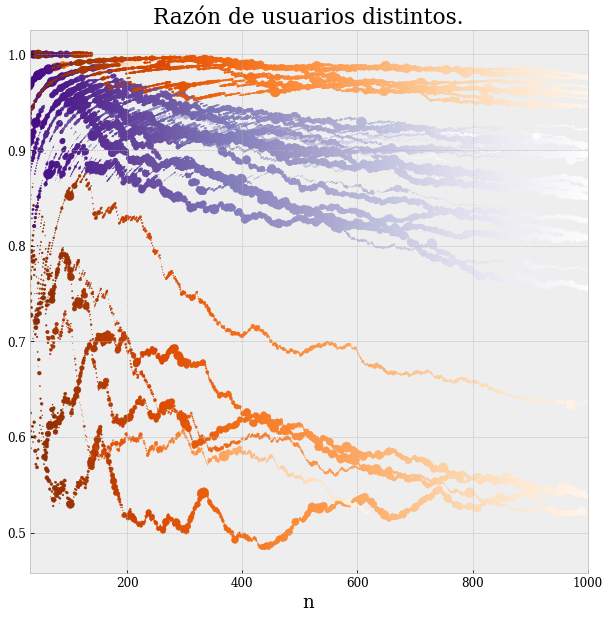

In [ ]:
#@title About 1000 tweets before peak.
path = "/content/drive/MyDrive/NetworkAnalysis_TwitterTrends/data_new_vecindad/data_nodes_df"
path_network = "/content/drive/MyDrive/NetworkAnalysis_TwitterTrends/data_new_vecindad/data_cm_network/"
path_df = "/content/drive/MyDrive/NetworkAnalysis_TwitterTrends/data_df_vecindad"
n = 50
#n = len(os.listdir(path))
i = 1
dict_list_diffusion = {}

figuser_time, axusertime = plt.subplots()
figuser_time.set_size_inches([10,10])
#figuser_time.set_size_inches([7,7])
#axusertime.set_xscale('log')
axusertime.set_xlabel("n")
non_useful_trend = ['first20songsonshuffle','teamautofollow','weed',
                   'bizitalk', 'autofollowback','team','soundcloud','tweetyourheight',
                    'hardestthingsinlife','bbl']
for file_trend in os.listdir(path)[0:n]:
  trend = file_trend.split('.')[0]
  if not trend in non_useful_trend:
    #print(i,"/",n," - Trabajando trend: - ", trend)
    path_file = "{}/{}.gml".format(path_network,trend)
    b = B[ B['trend'] == trend]['burst'].to_list()[0]
    #G = nx.read_gml(path_file)
    #Difusión
    #dict_list_diffusion[trend] = make_procees_difusion(G)

    #DF los que inicias
    path_file = "{}/{}".format(path_df,file_trend)
    foo_df = pd.read_csv(path_file)

    foo_dataframe = pd.DataFrame(data = {'time': np.array(foo_df['time'], dtype='datetime64'),
                                              'count': np.repeat([1], repeats= foo_df['time'].shape[0])})
    
    freq = "25min"
    foo = foo_dataframe.groupby( pd.Grouper(key="time",freq=freq) ).sum()
    peak = foo[foo['count'] == max(foo['count'])].index.format()[0]
    steps = 15

    axusertime.set_title('Razón de usuarios distintos.')

    before_count_peak =  foo[foo.index <= peak ].iloc[-steps:,:]
    df_before_peak = foo_df[ foo_df['time'] < peak][['time','userid']]
    n_before = min([df_before_peak.shape[0], 1000])

    proporcion = []
    len_users = df_before_peak['userid'].to_list()
    len_users.reverse()
    len_users = len_users[0:n_before]
    len_users.reverse()

    len_times = df_before_peak['time'].to_list()
    len_times.reverse()
    len_times = len_times[0:n_before]
    len_times.reverse()
    len_times = np.array(len_times, dtype='datetime64')

    eastern = pytz.timezone('US/Eastern')
    final = [int(eastern.localize(dt.astype(datetime)).timestamp()) for dt in len_times]
    final = np.diff(final)
    final = [1] + final.tolist()
    final = 100 * np.array(final) / np.max(final)
    for k in range(n_before):
      proporcion.append( len(pd.unique(len_users[0:k+1])) / (k+1))
    #proporcion = np.log10(proporcion)
    if b:
      axusertime.scatter(range(n_before), proporcion, c = range(n_before),
                      s = final,
                      cmap = 'Purples_r')
      #axusertime.plot(range(n_before), proporcion, marker = '$x$', alpha = 0.5, color = 'red', 
      #                linestyle = 'dashed', label = "{} - {}".format(trend,b) )
    else:
      axusertime.scatter(range(n_before), proporcion, c = range(n_before),
                      s = final,
                      cmap = 'Oranges_r')
      #axusertime.plot(range(n_before), proporcion, marker = 's', color = 'cyan',
      #                linestyle = 'dashed', label = "{} - {}".format(trend,b) )

    #print(i,"/",n," - Terminando trend: - ", trend)
    if proporcion[-1] > 0.95 and b == 1:
      print(trend)
    if proporcion[-1] < 0.9 and b == 0:
      print(trend)

    i += 1

axusertime.set_xlim([30,1000])
figuser_time.savefig("razonusuarios.pdf")

plt.show()

#Logic and important codes for network

## About NCT (the first 'last model') 

The function *make_graphs_last_model* make temporal networks (by hour) and calculate the following metrics: 

- Layer *Twitter* 
  - Clustering 
  - Betweennes
  - Degree distribution entropy
  - Mean degree
  - Mean shortest path

- Layer *Retweet*
  - Diameter (maximun exccentr
  - Maximun out degree 

- Layer *Mention* (To remenber: In this case, i dont use this network).
  - Diameter (maximun exccentr
  - Maximun out degree

In [ ]:
def make_graphs_last_model(trend,count_i,count_j):
  #GENERAMOS LOS DATAFRAMES
 
  #TWEETS
  df_rel_tweets = pd.DataFrame([ k.split(',') for k in dic_tweets_user[trend]]
                   , columns = ['time','userid'])
  df_rel_tweets['time'] = pd.to_datetime(df_rel_tweets['time'],unit='s')
 
  df_rel_tweets['day'] = df_rel_tweets['time'].apply(giveday)
  df_rel_tweets['hour'] = df_rel_tweets['time'].apply(givehour)
 
  """
  days = df_rel_tweets.groupby('day')
  daycount = days['day'].count()
  timedict = daycount.to_dict()
  
  plt.plot(list(timedict.keys()), list(timedict.values()),
          label = "#{}; n = {}".format(trend,
                                        np.sum(list(timedict.values()))),
            color = "red")
  plt.legend()
  plt.show()
  """
  
  #RETWEETS
  df_rel_retweets = pd.DataFrame([ k.split(',') for k in dic_retweets_user[trend]]
                   , columns = ['time','target','source'])
  df_rel_retweets['time'] = pd.to_datetime(df_rel_retweets['time'],unit='s')
 
  df_rel_retweets['day'] = df_rel_retweets['time'].apply(giveday)
  df_rel_retweets['hour'] = df_rel_retweets['time'].apply(givehour)
 
  #MENTIONS
  df_rel_mentions = pd.DataFrame([ k.split(',') for k in dic_mentions_user[trend]]
                   , columns = ['time','source','target'])
  df_rel_mentions['time'] = pd.to_datetime(df_rel_mentions['time'],unit='s')
 
  df_rel_mentions['day'] = df_rel_mentions['time'].apply(giveday)
  df_rel_mentions['hour'] = df_rel_mentions['time'].apply(givehour)
 
  
  #VAMOS A SACAR LOS DÍAS Y HORAS DE OPERACIÓN
  set_days_to_tweets = set(pd.unique(df_rel_tweets['day']).tolist())
  set_days_to_retweets = set(pd.unique(df_rel_retweets['day']).tolist())
  set_days_to_mentions = set(pd.unique(df_rel_mentions['day']).tolist())
  study_days = list( set_days_to_tweets | set_days_to_retweets | set_days_to_mentions)
  
 
  sum_p =0 
  final_df = []
  for day in study_days:
    for hour in range(0,24):
      sub_list = list()
      make_noise ="{} / {} --- {} ----------------> DAY {} - HOUR {} ".format(count_i,
                                                                              count_j,
                                                                              trend,
                                                                              day,
                                                                              hour) 
      print(make_noise)
      #-----------------------------PARA TWEETS
      tweets_for_day = df_rel_tweets[df_rel_tweets['day'] == day]
      tweets_for_hour = tweets_for_day[tweets_for_day['hour'] == hour]
      best_sample = pd.unique(tweets_for_hour['userid'])
      edge_tweets_for_hour = df_mutual_follow[df_mutual_follow['source'].isin(best_sample)]
 
      nsize = Ntwets = edge_tweets_for_hour.shape[0]
      f_limit = 10000
      #
      #if nsize > f_limit:
      #  edge_tweets_for_hour = edge_tweets_for_hour.sample(n = f_limit,
      #                                                     random_state = np.random.RandomState(main_seed))
      #Por hora
 
      
 
      G_tweets = nx.Graph()
      nx.from_pandas_edgelist(df = edge_tweets_for_hour,
                          source = 'source',
                          target = 'target',
                          create_using=G_tweets)
 
      #A LO MÁS 10,000 NODOS
 
      if len(G_tweets) > f_limit:
        sample = np.random.choice(np.array(list(G_tweets.nodes)),size=2500)
        G_tweets = G_tweets.subgraph(sample)
 
      kj = min([int(G_tweets.number_of_nodes() / 4),100])
 
      #METRICS
      Ntwets = tweets_for_hour.shape[0]
      STweets = entropy_of_graph(G_tweets)
      
      g_betweenes = 0
      try:
        g_betweenes = np.nanmean(list( nx.betweenness_centrality(G_tweets, k=kj).values() ) )
        if pd.isnull(g_betweenes):
          g_betweenes = 0
      except:
        g_betweenes = 0
      
 
      
      g_clustering = get_clustering_grapg(G_tweets)
 
      mean_k = mean_degree(G_tweets)
      mean_L = mean_shortest_path(G_tweets)
 
 
 
      #------------------------------PARA RETWEETS
      retweets_for_day = df_rel_retweets[df_rel_retweets['day'] == day]
      edges_retweets_for_hour = retweets_for_day[retweets_for_day['hour'] == hour]
 
      G_retweets = nx.DiGraph()
      nx.from_pandas_edgelist(df = edges_retweets_for_hour,
                          source = 'source',
                          target = 'target',
                          create_using=G_retweets)
 
 
      #METRICS
      Nretwets = edges_retweets_for_hour.shape[0]
 
      diam_retweets = mean_diameter(G_retweets)
      vecin_retweets = get_vecindad_mas_grande(G_retweets)
 
 
 
      
 
      #------------------------------PARA MENTIONS
      mentions_for_day = df_rel_mentions[df_rel_mentions['day'] == day]
      edges_mentions_for_hour = mentions_for_day[mentions_for_day['hour'] == hour]
 
      G_mentions = nx.DiGraph()
      nx.from_pandas_edgelist(df = edges_mentions_for_hour,
                          source = 'source',
                          target = 'target',
                          create_using=G_mentions)
 
      #METRICS
      Nmentions = edges_mentions_for_hour.shape[0]
 
      diam_mentions = mean_diameter(G_mentions)
      vecin_mentions = get_vecindad_mas_grande(G_mentions)
 
 
      """
      ADD DATA
      """
      sub_list.append(day)
      sub_list.append(hour)
      sub_list.append(Ntwets)
      sub_list.append(Nretwets)
      sub_list.append(Nmentions)
 
      sub_list.append(mean_k)
      sub_list.append(mean_L)
 
      sub_list.append(g_clustering)
      sub_list.append(g_betweenes)
      sub_list.append(STweets)
 
      sub_list.append(diam_retweets)
      sub_list.append(vecin_retweets)
 
      sub_list.append(diam_mentions)
      sub_list.append(vecin_mentions)
 
      final_df.append(sub_list)
 
      columns = ["day",
                 "hour",
                 "ntweets",
                 "nretweets",
                 "nmentions",
                 "k",
                 "L",
                 "clustering",
                 "betweenness",
                 "entropy",
                 "diam_rt",
                 "v_rt",
                 "diam_ment",
                 "v_ment"]
  return pd.DataFrame(data=final_df, columns= columns)
#A = make_graphs_last_model(trend)

In [ ]:
#@title Read and save the data of dataframes

from os import listdir
from os.path import isfile, join
listfilenametrend = [f.split(".")[0] for f in listdir('/content/drive/MyDrive/TestFolder/datafortime')]
restan_trends = list(set(list_trends) & set(listfilenametrend))
def get_dict_finaldataframe():
  """
  Read and get the generated dataframes of the make_graphs_last_model.

  Return a dictionary with those dataframes indexed by trend name
  """
  return_dict = {}
  for trend in restan_trends:
    mini_path = "{}.csv".format(trend)
    thepath = "{}/{}".format('/content/drive/MyDrive/TestFolder/datafortime',mini_path)
    df = pd.read_csv(thepath)
    return_dict[trend] = df
  return return_dict
dict_of_df = get_dict_finaldataframe()

dict_of_bursts = {}

### This is the actually final function to generate the dataframe to make the analysis. I used some stadistics of the generated values in *make_graphs_last_model*. 

In this case, the following function make the final Dataframe with the columns: 
- Mean of *NTweets*
- Mean of *NReTweets*
- Mean of *NMentions*
- **Max** of *k* (mean degree) 
- **Max** of *L* (mean shortest path) 
- Mean of clustering.
- Mean of betweennes.
- Mean of entropy.
- **Max** of diameters of retweet layer 
- **Max** of maximun degree of retweet layer
- **Max** of diameters of mention layer 
- **Max** of maximun degree of mention layer

I add two more columns whith some importan information 
- 'r' is the assortativity coefficient of the social generate by ALL the user in the activity. 



In [ ]:
for trend in list(dict_of_df.keys()):
  df = dict_of_df[trend]
  if max(df['ntweets']) > 100:
    dict_of_bursts[trend]['burst'] = 1
  else:
    dict_of_bursts[trend]['burst'] = 0

In [ ]:
#Recordamos que el coeficiente de asortativida es ibtenido de todos con todos. 
for trend in list(dict_of_df.keys()):
  df_rel_tweets = pd.DataFrame([ k.split(',') for k in dic_tweets_user[trend]]
                   , columns = ['time','userid'])
  G_tweets = nx.Graph()
  best_sample = pd.unique(df_rel_tweets['userid'])
  edge_tweets_for_hour = df_mutual_follow[df_mutual_follow['source'].isin(best_sample)]
  nx.from_pandas_edgelist(df = edge_tweets_for_hour,
                      source = 'source',
                      target = 'target',
                      create_using=G_tweets)
  
  r = nx.algorithms.assortativity.degree_pearson_correlation_coefficient(G_tweets)
  try: 
    dict_of_bursts[trend]['r'] = r
  except:
    dict_of_bursts[trend] = {}
    dict_of_bursts[trend]['r'] = r

In [ ]:
final_list = []

name_columns = ['trend','ntweets', 'nretweets', 'nmentions', 'k', 'L',
       'clustering', 'betweenness', 'entropy', 'diam_rt', 'v_rt', 'diam_ment',
       'v_ment', 'r','burst']

for trend in list(dict_of_df.keys()):
  sub_list = [trend]

  df_aux = dict_of_df[trend]
  #df_aux = df_aux[ df_aux['ntweets'] > 0 ]

  sub_list.append(np.mean(df_aux['ntweets']))
  sub_list.append(np.mean(df_aux['nretweets']))
  sub_list.append(np.mean(df_aux['nmentions']))

  sub_list.append(np.max(df_aux['k']))
  sub_list.append(np.max(df_aux['L']))

  sub_list.append(np.mean(df_aux['clustering']))
  sub_list.append(np.mean(df_aux['betweenness']))
  sub_list.append(np.mean(df_aux['entropy']))

  sub_list.append(np.max(df_aux['diam_rt']))
  sub_list.append(np.max(df_aux['v_rt']))

  sub_list.append(np.max(df_aux['diam_ment']))
  sub_list.append(np.max(df_aux['v_ment']))


  sub_list.append(dict_of_bursts[trend]['r'])
  sub_list.append(dict_of_bursts[trend]['burst'])

  final_list.append(sub_list)

df_foo = pd.DataFrame(data=final_list,columns=name_columns)

## About G(h) (the social network before the burst moment)

## Notes: 

The path of the .gexf data with the all complete data is on 

"/content/drive/MyDrive/NetworkAnalysis_TwitterTrends/data_max_interact/{}.gexf"

In [ ]:
def array_vecinos_active( node_active, limit= 10000):
  final_array = np.array(node_active).astype(int)
  foo_node_active = node_active
  while len(final_array) < limit:
    vecindad_1 = df_mutual_follow['target'].isin(foo_node_active) | df_mutual_follow['source'].isin(node_active)
    vecinos_1 = df_mutual_follow[vecindad_1]
    df_vecinos = vecinos_1[vecinos_1.isin(foo_node_active) == False]
    vecinos_source = df_vecinos['source'].dropna().to_numpy().astype(int)
    vecinos_target = df_vecinos['target'].dropna().to_numpy().astype(int)
    array_vecinos = np.concatenate([ vecinos_source ,vecinos_target]).astype(int)
    if len(array_vecinos) > 1000:
      array_vecinos = np.random.choice(array_vecinos, 250)
    final_array = np.unique(np.concatenate([final_array, array_vecinos]).astype(int))
    foo_node_active = array_vecinos
  return np.unique(final_array.astype(int))

#trend = list(dict_of_max_graph.keys())[5]
#b = B[ B['trend'] == trend]['burst'].to_list()[0]
import logging
dict_node_actives_trend = {}

def aux_function(trend):
  print("BEGIN", "-------->",trend)
  #motifs_dict_df_trends[trend] = get_df_frac_motifs(trend)
  print("END", "-------->",trend)


def foo_generate_nodes_active(trend):
  df_trend = dict_of_max_graph[trend]['df_GT']
  b = B[ B['trend'] == trend]['burst'].to_list()[0]
  active_nodes = pd.unique(df_trend['userid'].to_numpy()).astype(int)
  dict_node_actives_trend[trend] = array_vecinos_active(active_nodes)

class MyThread(threading.Thread):
  def __init__(self,k):
    self.__trend = trend
    self.k = k
    threading.Thread.__init__(self)
    
  def run(self):
    for trend in list(dict_of_max_graph.keys())[ 50* self.k :50*(self.k +1)]:
      print("BEGIN", "-------->",trend)
      df_trend = dict_of_max_graph[trend]['df_GT']
      #b = B[ B['trend'] == trend]['burst'].to_list()[0]
      active_nodes = pd.unique(df_trend['userid'].to_numpy()).astype(int)
      array_vecinos = array_vecinos_active(active_nodes)
      vecindad_1 = df_mutual_follow['target'].isin(array_vecinos) | df_mutual_follow['source'].isin(array_vecinos)
      vecinos_1 = df_mutual_follow[vecindad_1]
      vecinos_1 = vecinos_1[vecinos_1.isin(array_vecinos)].dropna().astype(int)

      df = vecinos_1
      G = nx.Graph()
      nx.from_pandas_edgelist(df, source='source', target='target', 
                          create_using=G)
      df_trend = dict_of_max_graph[trend]['df_GT']
      active_nodes = pd.unique(df_trend['userid'].to_numpy()).astype(int)
      attrs = {}
      for node in G.nodes():
        if node in active_nodes:
          attrs[node] = 1
        else:
          attrs[node] = 0
      nx.set_node_attributes(G, attrs, 'b')
      nx.write_gexf(G, "/content/drive/MyDrive/NetworkAnalysis_TwitterTrends/data_max_interact/{}.gexf".format(trend))

      print("END", "-------->",trend)
      #foo_list_foo.append(trend)

 
list_thread = []
 
#trends_to_study = list(set(list(B['trend'])) - set(list_already_trends))
for k in [0,1,2]:
  t1 = MyThread(k)
  list_thread.append(t1)
  t1.start()

for index, thread in enumerate(list_thread):
  logging.info("MAIN     before joining thread {}".format(index))
  thread.join()
  logging.info("MAIN     thread  {}".format(index))